In [3]:
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Read the data and filter out the schools
data = pd.read_csv(os.path.join('data', 'certificates.csv'))
target_cat = 'Schools And Seasonal Public Buildings'
schools = data[data['MAIN_BENCHMARK'].str.lower() == target_cat.lower()]

In [5]:
def remove_duplicate_buildings(schools):
    #Sort data by date
    schools = schools.sort_values(by='LODGEMENT_DATE')

    # Remove duplicate buildings based on the 'BUILDING_REFERENCE_NUMBER' column
    schools_sorted = schools.drop_duplicates(subset='BUILDING_REFERENCE_NUMBER', keep='first')
    
    return schools_sorted
schools_sorted = remove_duplicate_buildings(schools)
schools_sorted.to_csv('schools_sorted.csv', index=False)

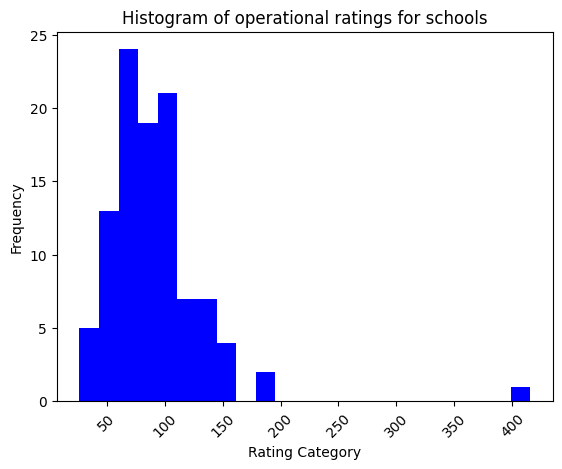

In [7]:
# Read the CSV file into a DataFrame
df = pd.read_csv('schools_sorted.csv')

# Filter out values where 'CURRENT_OPERATIONAL_RATING' is over 1000, under 1, or exactly 200
df = df[(df['CURRENT_OPERATIONAL_RATING'] <= 1000) & (df['CURRENT_OPERATIONAL_RATING'] >= 1) & (df['CURRENT_OPERATIONAL_RATING'] != 200)]

# Drop rows with NaN values
df = df.dropna(subset=['CURRENT_OPERATIONAL_RATING'])

# Compute histogram dynamically based on data range
ratings = df['CURRENT_OPERATIONAL_RATING'].values
hist, bins = np.histogram(ratings, bins='auto')

# Plot the histogram
plt.bar(bins[:-1], hist, width=np.diff(bins), color='blue')

# Add title and labels
plt.title(f'Histogram of operational ratings for schools')
plt.xlabel('Rating Category')
plt.ylabel('Frequency')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Create the "plots" directory if it doesn't exist
if not os.path.exists(f'plots'):
    os.makedirs(f'plots')

# Save the plot to the respective folder
plt.savefig(f'plots/histogram.png', bbox_inches='tight')  # Adjust bounding box to include labels

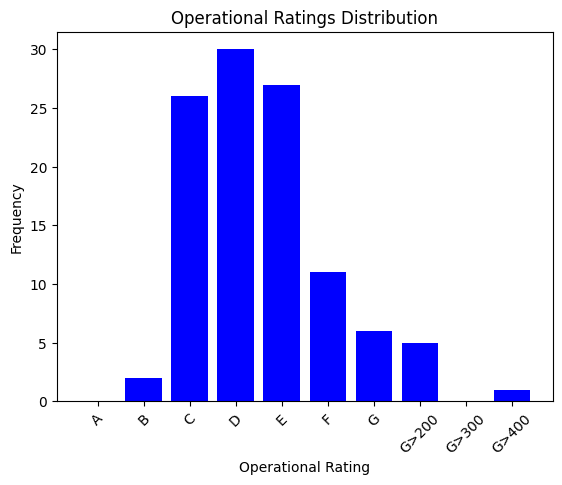

In [13]:
# Define the bins and labels
bins = [5, 25, 50, 75, 100, 125, 150, 200, 300, 400, 800]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'G>200', 'G>300', 'G>400']

# Load the data from 'schools_sorted.csv' into a DataFrame
df = pd.read_csv('schools_sorted.csv')

# Extract the column containing the ratings
# Cut the data into the bins and count
df['Rating_Category'] = pd.cut(df['CURRENT_OPERATIONAL_RATING'], bins=bins, labels=labels, right=False)
hist_data = df['Rating_Category'].value_counts().sort_index()
hist_data_sorted = hist_data.reset_index().rename(columns={'index': 'Rating_Category', 'Rating_Category': 'Frequency'})

# Create the histogram
plt.bar(hist_data.index.astype(str), hist_data.values, color='blue')

# Set the x-axis labels using the provided labels
plt.xticks(rotation=45)

# Set the title and labels for the histogram
plt.title('Operational Ratings Distribution')
plt.xlabel('Operational Rating')
plt.ylabel('Frequency')

# Create the "plots" directory if it doesn't exist
if not os.path.exists(f'plots'):
    os.makedirs(f'plots')

# Save the plot to the respective folder
plt.savefig(f'plots/Distribution.png', bbox_inches='tight')  # Adjust bounding box to include lab
